# Simulated Data Analysis

Plan for the simulated analysis:
- Get Mean, Variance of each variable, plot histogram of each variable DONE
- see how many estimated values are significant, subset data based on significant p-values (for each parameter separately?) DONE
- TODO Tommorow:
    - repeat for Scenarios 2 and 3
    - Intepret results - think about the implications of values with regards to the Scenarios model tokens
    - Check the gennerated data on cloud
    - Do the Regression on random data


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

--###---- Scenario 1 ----###-- 
Significant alphas: 1187
Significant betas: 4104
Significant gammas: 240
All data: Skewness mean: 0.0232, St.D: 0.1751
Alphas:   Skewness mean: 0.0202, St.D: 0.1748
Betas:    Skewness mean: 0.0289, St.D: 0.1717
Gammas:   Skewness mean: -0.0228, St.D: 0.1521


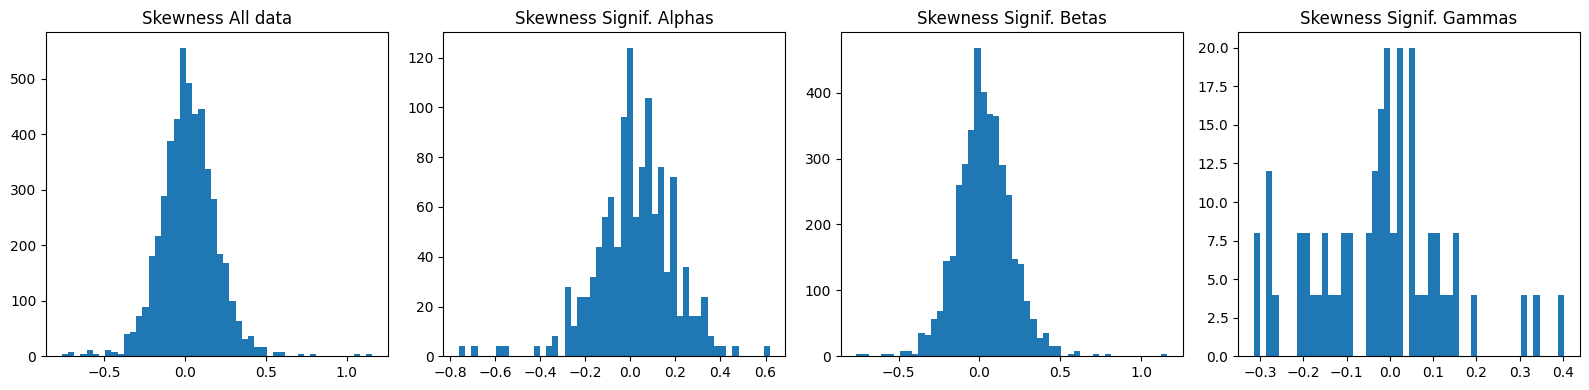

All data: Kurtosis mean: 2.5397, St.D: 1.1726
Alphas:   Kurtosis mean: 2.4978, St.D: 0.9724
Betas:    Kurtosis mean: 2.5142, St.D: 1.1174
Gammas:   Kurtosis mean: 2.4021, St.D: 0.744


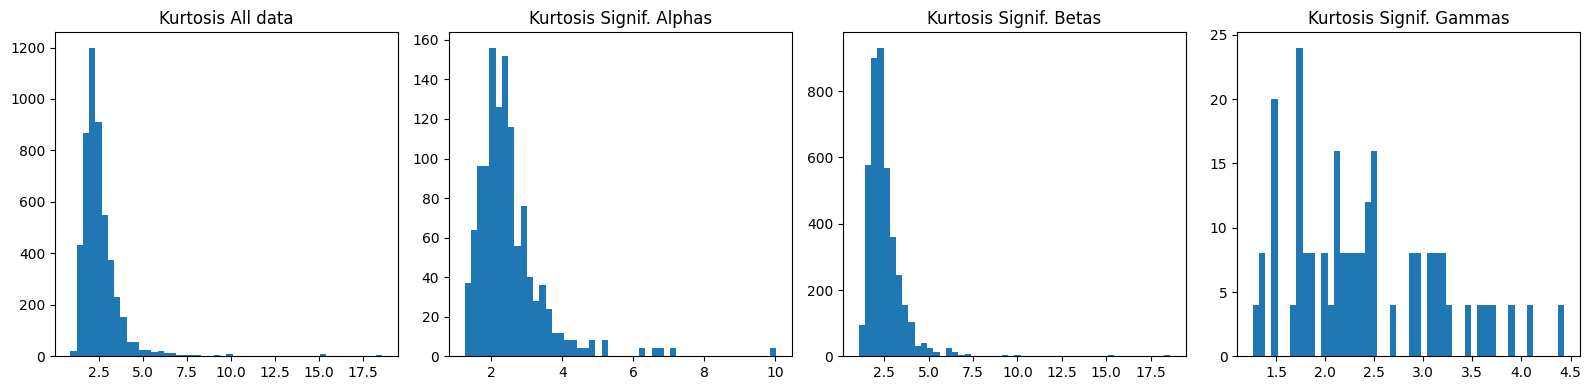

All data: DW mean: 2.145, St.D: 0.0399
Alphas:   DW mean: 2.1472, St.D: 0.0388
Betas:    DW mean: 2.1436, St.D: 0.0396
Gammas:   DW mean: 2.1459, St.D: 0.0413


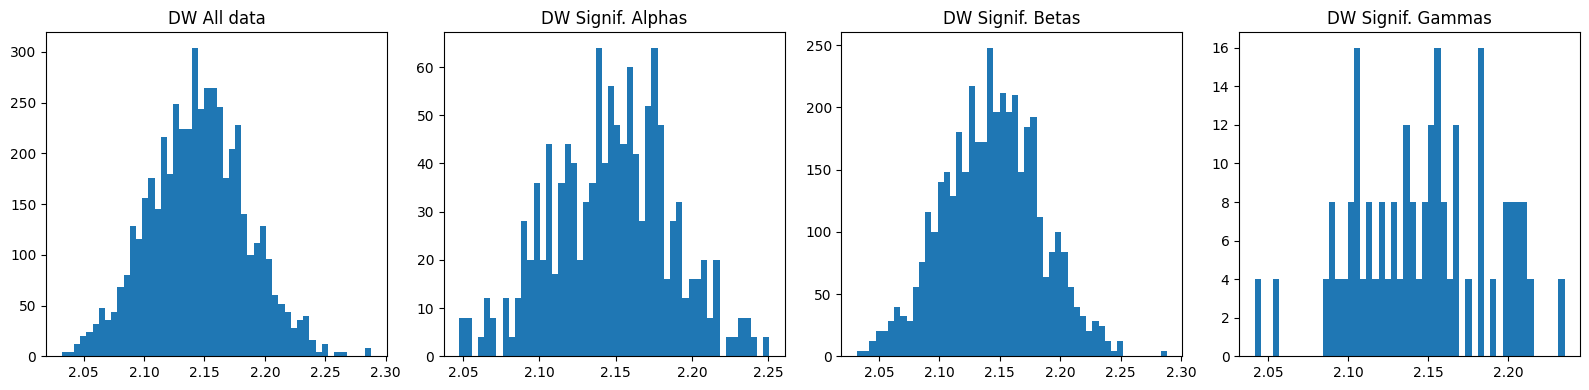

All data: DW_absolute mean: 0.9174, St.D: 0.029
Alphas:   DW_absolute mean: 0.9112, St.D: 0.0295
Betas:    DW_absolute mean: 0.9188, St.D: 0.0283
Gammas:   DW_absolute mean: 0.9133, St.D: 0.0328


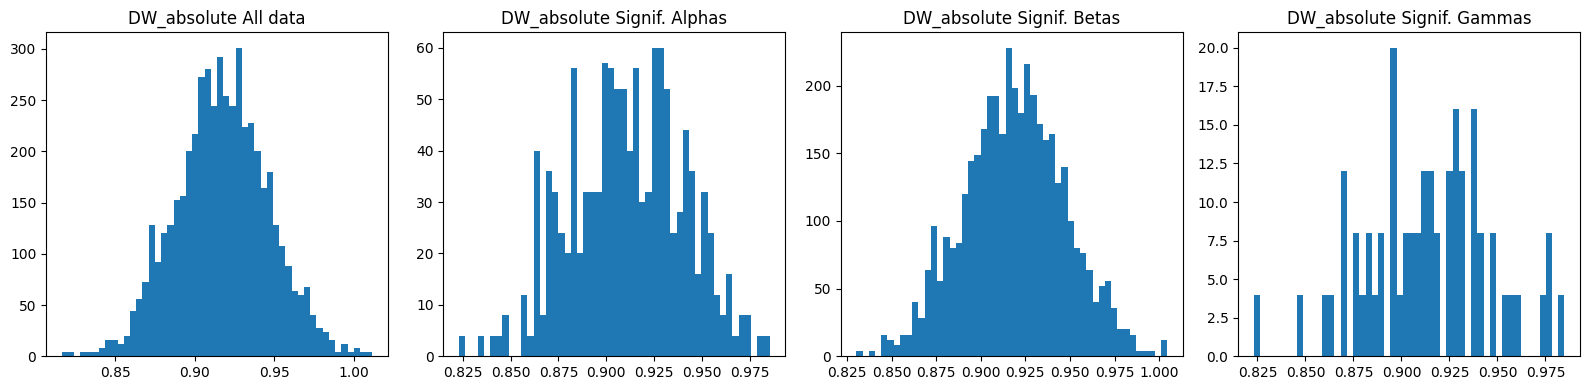

All data: alphas mean: 0.0203, St.D: 0.021
Alphas:   alphas mean: 0.031, St.D: 0.0241
Betas:    alphas mean: 0.0168, St.D: 0.016
Gammas:   alphas mean: 0.0259, St.D: 0.0199


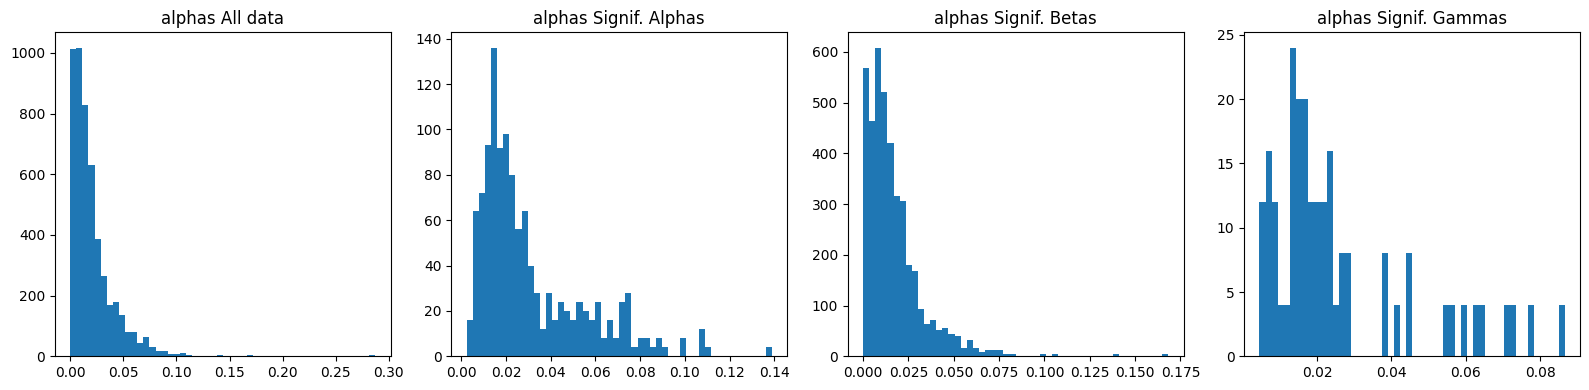

All data: betas mean: 0.7885, St.D: 0.2928
Alphas:   betas mean: 0.8263, St.D: 0.2627
Betas:    betas mean: 0.9013, St.D: 0.1189
Gammas:   betas mean: 0.8176, St.D: 0.2709


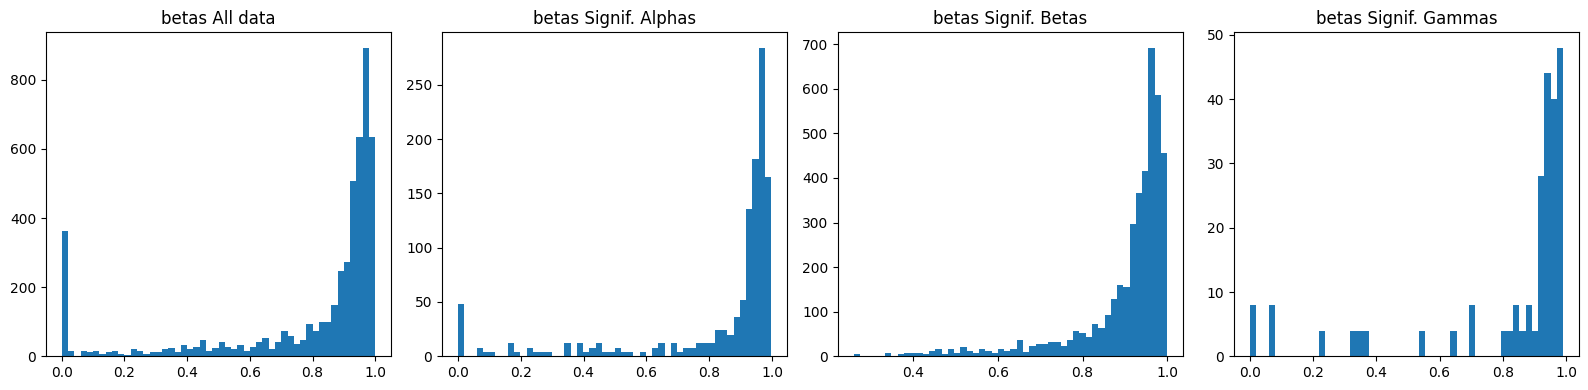

All data: gammas mean: 0.0007, St.D: 0.0333
Alphas:   gammas mean: 0.0008, St.D: 0.0359
Betas:    gammas mean: 0.0009, St.D: 0.0299
Gammas:   gammas mean: -0.0022, St.D: 0.0644


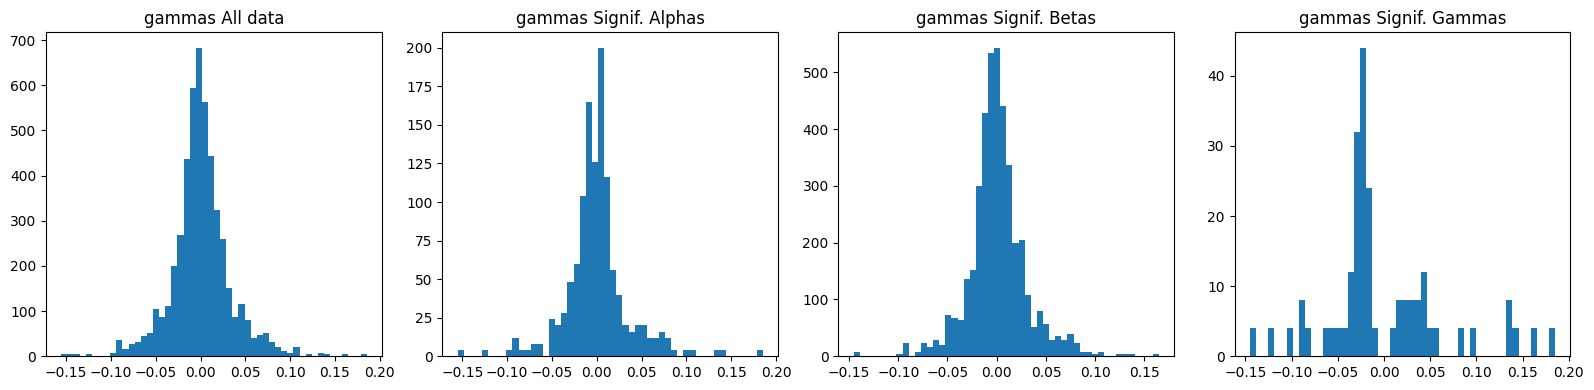

In [33]:
##Scenario 1
file_path = r"D:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\simulated_data\Scenario1_5000runs_20230530_0839.csv"
df = pd.read_csv(file_path)
#measures = ['Skewness', 'Kurtosis', 'DW', 'DW_absolute', 'alphas', 'alphas_pval', 'betas', 'betas_pval', 'gammas', 'gammas_pval']
measures = ['Skewness', 'Kurtosis', 'DW', 'DW_absolute', 'alphas', 'betas',  'gammas']

print("--###---- Scenario 1 ----###-- ")

# df = df[['Skewness', 'Kurtosis', 'DW', 'DW_absolute', 'alphas', 'alphas_pval',
#        'betas', 'betas_pval', 'gammas', 'gammas_pval']]

alphas_signif = df[df.alphas_pval <= 0.05]
betas_signif = df[df.betas_pval <= 0.05]
gammas_signif = df[df.gammas_pval <= 0.05]

print(f"Significant alphas: {len(alphas_signif)}")
print(f"Significant betas: {len(betas_signif)}")
print(f"Significant gammas: {len(gammas_signif)}")


for measure in measures:
    # if measure in ['alphas', 'betas',  'gammas']:
    #     print(f"Significant {measure} mean: {round(np.mean(df[measure]), 4)}, St.D: {round(np.std(df[measure]), 4)}, count: ")
    # else:
    print(f"All data: {measure} mean: {round(np.mean(df[measure]), 4)}, St.D: {round(np.std(df[measure]), 4)}")
    print(f"Alphas:   {measure} mean: {round(np.mean(alphas_signif[measure]), 4)}, St.D: {round(np.std(alphas_signif[measure]), 4)}")
    print(f"Betas:    {measure} mean: {round(np.mean(betas_signif[measure]), 4)}, St.D: {round(np.std(betas_signif[measure]), 4)}")
    print(f"Gammas:   {measure} mean: {round(np.mean(gammas_signif[measure]), 4)}, St.D: {round(np.std(gammas_signif[measure]), 4)}")

    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

    names = ["All data", "Signif. Alphas", "Signif. Betas", "Signif. Gammas"]
    for ax, data, name in zip(axes, [df, alphas_signif, betas_signif, gammas_signif], names):
        ax.hist(data[measure], bins=50)
        ax.set_title(measure + " " + name)

    plt.tight_layout()
    plt.show()
